# The battle of natural parks: best locations for a hotel just outside of Paris 

## Business Problem


In light of how travelling is changing in Europe and in the rest of the world due to all the events that took place in 2020, an increasing demand for domestic travel is forecasted and it is believed that would be a popular choice for many who want to get away and avoid the hassle of travel restrictions.  
Therefore, with stay staycations becoming the new vacations model where people are looking for a change of scenery closer to home, reconneting with the nature, searching for relax and mindfulness whilst also travelling sustainably, a new business opportunity seem to arise from it. 

For this reason a study was put in place in finding the best city, just an hour or so outside of Paris, where people woould go for vacation to find relax and calm surrounded by green landscapes. 
The study was, in fact, also realized to study competitors in the area where the new business of a hotel could be placed and consequently define the optimal area for the investment. 


This project could then guide interested stakeholders for the development of a business plan.

## Criteria for the analysis  

Based on our business problem, geolocation data were be taken in consideration, analyzing in details the optimal city based on the following criteria:
- Low competition 
- Natural parks 


## Data workflow

In order to begin the analysis, data were taken from Wikipedia and from other websites containing all the informations relative to coordinates, postal codes, name's of the natural parks and their surfaces.
These data were cleaned and organized in different dataframes for a better visualization. Then were added to a folium map in order to visualize their position and grasp a first idea of the areas of interestes. 

Additional data on the position on existing hotels, being potential competitors for the business of interest were instead then collected from Foursquare. 
The analysis of these data allowed the identification of the city with a low number of competitors and a good surface of parks likely to ensure a high possibility of success for a new hotel. 

As a first step, all the packages that might be necessary for the project in Python were imported.

In [5]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim # (for obtaining an address's lat and long)
from pandas.io.json import json_normalize # (for transforming JSON into df if needed)
from sklearn.cluster import KMeans
import matplotlib.cm as cm # (for plotting)
import matplotlib.colors as colors 
print ('All the packages have been imported.')

All the packages have been imported.


A first dataframe was created with the list of the cities closer to the parks, including their names and postal codes. 

In [6]:
data = { 'Parks': ['Parc Naturel Régional Oise', ' Parc Jean-Jacques Rousseau','Parc Naturel de la Haute Vallée','Forêt de Fontainebleau','Domaine National','Château de Versailles'],
         'City': ['Orry-la-Ville', 'Ermenonville','Chevreuse','Fontainebleau','Saint-Cloud','Versailles'],
        'Postal code' : ['60560','60950','78460','77300','92210','78000']
        
         }                        

df = pd.DataFrame (data, columns = ['Parks', 'City','Postal code'])
df

,Parks,City,Postal code
0,Parc Naturel Régional Oise,Orry-la-Ville,60560
1,Parc Jean-Jacques Rousseau,Ermenonville,60950
2,Parc Naturel de la Haute Vallée,Chevreuse,78460
3,Forêt de Fontainebleau,Fontainebleau,77300
4,Domaine National,Saint-Cloud,92210
5,Château de Versailles,Versailles,78000


A second dataframe, instead, included all their GPS coordinates. 
These two dataframes were subsequently merged.

In [7]:
GPS = {'City': ['Orry-la-Ville', 'Ermenonville','Chevreuse','Fontainebleau','Saint-Cloud','Château de Versailles'],
        'Latitude': ['49.13345', '49.125','48.6999972','48.404675','48.848','48.804722'],
         'Longitude' : ['2.51139','2.698','2.0333332','2.701620','2.211','2.121782']
         }                        

df_2 = pd.DataFrame (GPS, columns = ['City','Latitude','Longitude'])
df_2

,City,Latitude,Longitude
0,Orry-la-Ville,49.13345,2.51139
1,Ermenonville,49.125,2.698
2,Chevreuse,48.6999972,2.0333332
3,Fontainebleau,48.404675,2.701620
4,Saint-Cloud,48.848,2.211
5,Château de Versailles,48.804722,2.121782


In [8]:
df_pr = pd.merge(df, df_2, on = 'City')
df_pr = df_pr [['City', 'Parks', 'Latitude', 'Longitude']]
df_pr

,City,Parks,Latitude,Longitude
0,Orry-la-Ville,Parc Naturel Régional Oise,49.13345,2.51139
1,Ermenonville,Parc Jean-Jacques Rousseau,49.125,2.698
2,Chevreuse,Parc Naturel de la Haute Vallée,48.6999972,2.0333332
3,Fontainebleau,Forêt de Fontainebleau,48.404675,2.701620
4,Saint-Cloud,Domaine National,48.848,2.211


In order to create an initial map of the cities of interest showing their location in the area, the package folium was imported and used to create the map of Paris, based on the GPS coordinates of this city.

In [9]:
!pip install folium
import pandas as pd
import folium 
print('Folium installed and imported!')

     |████████████████████████████████| 93 kB 4.1 MB/s  eta 0:00:01
Folium installed and imported!


In [10]:
paris_map = folium.Map(location=[48.864716, 2.349014], zoom_start=10)
paris_map

To define the position of the cities in the map of Paris, the GPS coordinates from the previously merged dataframe were used and markers were added to the map.

In [11]:
parks  = folium.map.FeatureGroup()
for lat, lng, in zip(
        df_pr['Latitude'], 
        df_pr['Longitude']):
    
    
    label = folium.Popup(parse_html=True)
    parks.add_child(
    folium.CircleMarker(
        [lat, lng],
        radius = 10,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.3,
        parse_html = False)).add_to(paris_map)  
    

# add pop-up text to each marker on the map
latitudes = list(df_pr.Latitude)
longitudes = list(df_pr.Longitude)
labels = list(df_pr.Parks)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(paris_map)    
    
# add arrondissements to the map
paris_map.add_child(parks)

To obtain all the additional data from the Hôtels required for our study, such as their name and their coordinates, the Foursquare dataset was used. 
 

In [12]:
CLIENT_ID = 'VNDIMC2KYWYNL00R41B0XUZSVV4GYSDPRRO2DEPYAQA2KWQQ'
CLIENT_SECRET = 'HLOQ5U4GUXAINON3KKSEBVVRD0AE110JJYYSSNYIJ5H3IOWB'
VERSION = '20180605'
print ('Credentials inserted')

Credentials inserted


The study was then conducted in each city indiviadually and all the data obtained were then analized collectively. 

A call was sent to the API with the appropriate search query. Then the data from a JSON file were cleaned, filtered by removing what was not needed for our study and lasltly displayed on the initial map. 

# Foursquare, data cleaning and map visualization

## Orry-la-Ville 

In [13]:
# latitude and longitude values Orry-la-Ville
latitude = 49.13345
longitude = 2.51139
search_query = 'Hotel'
radius = 10000
LIMIT = 30
import requests 
print ('Parameters set')

Parameters set


In [14]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
results

{'meta': {'code': 200, 'requestId': '5ff20c7cdc429f5febd7f027'},
 'response': {'venues': [{'id': '4bc3330bdce4eee1a37c719d',
    'name': 'Tiara Chateau Hotel Mont Royal Chantilly',
    'location': {'address': 'Route de Plailly',
     'lat': 49.12639379632666,
     'lng': 2.5495146355780705,
     'labeledLatLngs': [{'label': 'display',
       'lat': 49.12639379632666,
       'lng': 2.5495146355780705}],
     'distance': 2885,
     'postalCode': '60520',
     'cc': 'FR',
     'city': 'La Chapelle-en-Serval',
     'state': 'Picardie',
     'country': 'France',
     'formattedAddress': ['Route de Plailly',
      '60520 La Chapelle en Serval',
      'France']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1609698428',
    'hasPerk': False},
   {'id': '

In [15]:
df_hotels_1 = json_normalize(venues)
df_hotels_1.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.crossStreet
0,4bc3330bdce4eee1a37c719d,Tiara Chateau Hotel Mont Royal Chantilly,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698428,False,Route de Plailly,49.126394,2.549515,"[{'label': 'display', 'lat': 49.12639379632666...",2885,60520,FR,La Chapelle-en-Serval,Picardie,France,"[Route de Plailly, 60520 La Chapelle en Serval...",NaN,NaN
1,4bc8dac0762beee1df993d38,Hotel La Nonette Orry-la-Ville,[],v-1609698428,False,Place De La Gare,49.139714,2.489877,"[{'label': 'display', 'lat': 49.13971372796330...",1714,NaN,FR,Orry-la-Ville,Picardie,France,"[Place De La Gare, Orry-la-Ville, France]",NaN,NaN
2,4fb6383ae4b012942f0b92ff,Piscine hotel Tiara Mont Royal Chantilly,"[{'id': '4bf58dd8d48988d132951735', 'name': 'H...",v-1609698428,False,NaN,49.133636,2.528498,"[{'label': 'display', 'lat': 49.13363647460937...",1246,NaN,FR,NaN,NaN,France,[France],NaN,NaN
3,4bc8d64f762beee106943d38,Hôtel Kyriad Chantilly,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698428,False,Rue des Fougères,49.203131,2.459822,"[{'label': 'display', 'lat': 49.20313058432602...",8617,60500,FR,Chantilly,Picardie,France,"[Rue des Fougères, 60500 Chantilly, France]",NaN,NaN
4,4bdee952fe0e62b5ba0b0606,Hotel Restaurant Relais d'Aumale Orry-la-Ville,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698428,False,37 place des Fêtes Henri Delaunay,49.154829,2.520396,"[{'label': 'display', 'lat': 49.15482921053017...",2468,60560,FR,Orry-la-Ville,Picardie,France,"[37 place des Fêtes Henri Delaunay, 60560 Orry...",NaN,NaN


In [16]:
filtered_columns = ['name', 'location.address', 'location.lat', 'location.lng', 'location.postalCode']
df_hotels_1 = df_hotels_1.reindex(columns = filtered_columns)
df_hotels_1.rename(columns={"location.address": "address", "location.lat": "latitude", "location.lng" : "longitude", "location.postalCode" : "postalCode"}, inplace = True)

df_hotels_1 = df_hotels_1.dropna()
df_hotels_1

,name,address,latitude,longitude,postalCode
0,Tiara Chateau Hotel Mont Royal Chantilly,Route de Plailly,49.126394,2.549515,60520
3,Hôtel Kyriad Chantilly,Rue des Fougères,49.203131,2.459822,60500
4,Hotel Restaurant Relais d'Aumale Orry-la-Ville,37 place des Fêtes Henri Delaunay,49.154829,2.520396,60560
5,B&B HOTEL,Rue Jean Moulin,49.088695,2.553427,95470
6,Hôtel des Trois Hiboux,Parc Astérix,49.129668,2.571211,60128
7,Hôtel Ibis Senlis,72 avenue du Général de Gaulle,49.208424,2.606454,60300
8,RESTAURANT LA VÉRANDA - Hôtel Dolce Chantilly,"Dolce Chantilly, Route d'Apremont-Vineuil St F...",49.204260,2.496831,60500
11,Hôtel GOLDEN TULIP ROISSY SAINT WITZ,1 rue Du Petit Marais,49.089776,2.554112,95470
12,Hôtel AKENA de Saint-Witz,Rue Jean Moulin,49.089033,2.554470,95470
15,Hotel Le Chantilly,"9, Petite Place Omer Vallon",49.193958,2.466115,60500


In [17]:
df_hotels_1.drop([4, 5, 8, 20, 25, 29], inplace = True) 
print('{} Venues were returned by Foursquare.'.format(df_hotels_1.shape[0]))

KeyError: '[29] not found in axis'

In [18]:
hotels  = folium.map.FeatureGroup()

for lat, lng, label in zip(df_hotels_1.latitude, df_hotels_1.longitude, df_hotels_1.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5, 
        color='blue',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(paris_map)


paris_map

 ## Ermenonville 

In [19]:
# latitude and longitude values Ermenonville
latitude = 49.125
longitude = 2.698
search_query = 'Hotel'
radius = 10000
LIMIT = 30
import requests 
print ('Parameters set')

Parameters set


In [20]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
results

{'meta': {'code': 200, 'requestId': '5ff20c7e4536486d2a7b7d1d'},
 'response': {'venues': [{'id': '4fe4b88fe4b08c67a3cc65dd',
    'name': 'Hôtel Ibis Senlis',
    'location': {'address': '72 avenue du Général de Gaulle',
     'lat': 49.208424396375456,
     'lng': 2.606453670452776,
     'labeledLatLngs': [{'label': 'display',
       'lat': 49.208424396375456,
       'lng': 2.606453670452776}],
     'distance': 11429,
     'postalCode': '60300',
     'cc': 'FR',
     'city': 'Senlis',
     'state': 'Picardie',
     'country': 'France',
     'formattedAddress': ['72 avenue du Général de Gaulle',
      '60300 Senlis',
      'France']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1609698430',
    'hasPerk': False},
   {'id': '4bc3330bdce4eee1a37c719d

In [21]:
df_hotels_2 = json_normalize(venues)
df_hotels_2.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id
0,4fe4b88fe4b08c67a3cc65dd,Hôtel Ibis Senlis,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698430,False,72 avenue du Général de Gaulle,49.208424,2.606454,"[{'label': 'display', 'lat': 49.20842439637545...",11429,60300,FR,Senlis,Picardie,France,"[72 avenue du Général de Gaulle, 60300 Senlis,...",NaN
1,4bc3330bdce4eee1a37c719d,Tiara Chateau Hotel Mont Royal Chantilly,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698430,False,Route de Plailly,49.126394,2.549515,"[{'label': 'display', 'lat': 49.12639379632666...",10817,60520,FR,La Chapelle-en-Serval,Picardie,France,"[Route de Plailly, 60520 La Chapelle en Serval...",NaN
2,4dd1a696b0fb0becaf872d54,Hôtel des Trois Hiboux,"[{'id': '4bf58dd8d48988d12f951735', 'name': 'R...",v-1609698430,False,Parc Astérix,49.129668,2.571211,"[{'label': 'display', 'lat': 49.12966767585972...",9250,60128,FR,Plailly,Picardie,France,"[Parc Astérix, 60128 Plailly, France]",NaN
3,4df84df9a809df9984e95153,Grange Homborn Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698430,False,2 chemin des Acacias,49.091428,2.660095,"[{'label': 'display', 'lat': 49.091428, 'lng':...",4647,77280,FR,Othis,Île-de-France,France,"[2 chemin des Acacias, 77280 Othis, France]",NaN
4,5f122bbb604afc055e0fb468,Hôtel Les Quais de Lutèce,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698430,False,NaN,49.130003,2.574737,"[{'label': 'display', 'lat': 49.130003, 'lng':...",8996,60128,FR,Plailly,Picardie,France,"[60128 Plailly, France]",NaN


In [22]:
filtered_columns_2 = ['name', 'location.address', 'location.lat', 'location.lng', 'location.postalCode']
df_hotels_2 = df_hotels_2.reindex(columns = filtered_columns_2)
df_hotels_2.rename(columns={"location.address": "address", "location.lat": "latitude", "location.lng" : "longitude", "location.postalCode" : "postalCode"}, inplace = True)

df_hotels_2 = df_hotels_2.dropna()
df_hotels_2

,name,address,latitude,longitude,postalCode
0,Hôtel Ibis Senlis,72 avenue du Général de Gaulle,49.208424,2.606454,60300
1,Tiara Chateau Hotel Mont Royal Chantilly,Route de Plailly,49.126394,2.549515,60520
2,Hôtel des Trois Hiboux,Parc Astérix,49.129668,2.571211,60128
3,Grange Homborn Hotel,2 chemin des Acacias,49.091428,2.660095,77280
5,hotel l'escale,Rue De La Belle Étoile,49.046760,2.660548,77230
7,Hôtel Des Ventes,63 Rue du Faubourg Saint-Martin,49.199243,2.579314,60300
12,Le Grand Duc,Parc Astérix,49.130165,2.570372,60128


In [23]:
df_hotels_2.drop([12], inplace = True) 
print('{} Venues were returned by Foursquare.'.format(df_hotels_2.shape[0]))

6 Venues were returned by Foursquare.


In [24]:
hotels  = folium.map.FeatureGroup()

for lat, lng, label in zip(df_hotels_2.latitude, df_hotels_2.longitude, df_hotels_2.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5, 
        color='blue',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(paris_map)


paris_map

## Chevreuse

In [25]:
# latitude and longitude values Chevreuse
latitude = 48.6999972
longitude = 2.0333332
search_query = 'Hotel'
radius = 10000
LIMIT = 30
import requests 
print ('Parameters set')

Parameters set


In [26]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
results

{'meta': {'code': 200, 'requestId': '5ff20c802b881e51cd6bf78b'},
 'response': {'venues': [{'id': '4bd1cbb05e0cce72c6ffa184',
    'name': 'Residence Hotel Les Ducs de Chevreuse',
    'location': {'address': '7 Route De Choisel',
     'lat': 48.70676010379457,
     'lng': 2.0350450173226085,
     'labeledLatLngs': [{'label': 'display',
       'lat': 48.70676010379457,
       'lng': 2.0350450173226085}],
     'distance': 763,
     'postalCode': '78460',
     'cc': 'FR',
     'city': 'Chevreuse',
     'state': 'Île-de-France',
     'country': 'France',
     'formattedAddress': ['7 Route De Choisel', '78460 Chevreuse', 'France']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1609698432',
    'hasPerk': False},
   {'id': '4fe891cae4b079b382082047',
    

In [27]:
df_hotels_3 = json_normalize(venues)
df_hotels_3.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id
0,4bd1cbb05e0cce72c6ffa184,Residence Hotel Les Ducs de Chevreuse,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698432,False,7 Route De Choisel,48.706760,2.035045,"[{'label': 'display', 'lat': 48.70676010379457...",763,78460,FR,Chevreuse,Île-de-France,France,"[7 Route De Choisel, 78460 Chevreuse, France]",NaN,NaN
1,4fe891cae4b079b382082047,Hôtel le Village,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698432,False,4 Rue Neuve,48.702641,2.132162,"[{'label': 'display', 'lat': 48.70264077, 'lng...",7266,91190,FR,Gif-sur-Yvette,Île-de-France,France,"[4 Rue Neuve, 91190 Gif-sur-Yvette, France]",NaN,NaN
2,51597e45f2e7e38265b2b498,Hôtel des Haras,"[{'id': '4bf58dd8d48988d1f8931735', 'name': 'B...",v-1609698432,False,NaN,48.688801,1.919135,"[{'label': 'display', 'lat': 48.688801, 'lng':...",8483,78720,FR,NaN,NaN,France,"[78720, France]",NaN,NaN
3,50acf552e4b09483058895c5,Hôtel Best Western The Wish Versailles,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698432,False,6 bis rue des Graviers,48.773920,2.063354,"[{'label': 'display', 'lat': 48.77391976753654...",8519,78280,FR,Guyancourt,Île-de-France,France,"[6 bis rue des Graviers, 78280 Guyancourt, Fra...",NaN,NaN
4,4df05c7445ddbf3897d1d5ec,Hôtel Balladins,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698432,False,NaN,48.756723,1.933081,"[{'label': 'display', 'lat': 48.75672278217548...",9698,78310,FR,Coignières,Île-de-France,France,"[78310 Coignières, France]",NaN,NaN


In [28]:
filtered_columns_3 = ['name', 'location.address', 'location.lat', 'location.lng', 'location.postalCode']
df_hotels_3 = df_hotels_3.reindex(columns = filtered_columns_3)
df_hotels_3.rename(columns={"location.address": "address", "location.lat": "latitude", "location.lng" : "longitude", "location.postalCode" : "postalCode"}, inplace = True)

df_hotels_3 = df_hotels_3.dropna()
df_hotels_3

,name,address,latitude,longitude,postalCode
0,Residence Hotel Les Ducs de Chevreuse,7 Route De Choisel,48.706760,2.035045,78460
1,Hôtel le Village,4 Rue Neuve,48.702641,2.132162,91190
3,Hôtel Best Western The Wish Versailles,6 bis rue des Graviers,48.773920,2.063354,78280
5,Hôtel des Finances de Saint Quentin en Yvelines,2 avenue du centre,48.788619,2.052852,78042
6,Hotel de la Chapelle,"2, Route de Cheuvreuse",48.725225,2.049254,78470
7,Hôtel ibis,2 place de la Paix Celeste,48.789093,2.035731,78180
8,Hôtel F1 Plaisir,"36 Rue Pierre Curie, Zi Les Gâtines",48.802928,1.972690,78370
9,Hotel Le Coupières,27 Rue Juliette Adam,48.701702,2.126911,91190
10,Hotel Ibis,Domaine De La Cour Roland,48.777684,2.177394,78350
11,Buc Lounge Hotel,12 rue Louis Massotte,48.772133,2.124440,78530


In [29]:
df_hotels_3.drop([4, 16, 24, 29], inplace = True) 
print('{} Venues were returned by Foursquare.'.format(df_hotels_3.shape[0]))

KeyError: '[ 4 24] not found in axis'

In [30]:
hotels  = folium.map.FeatureGroup()

for lat, lng, label in zip(df_hotels_3.latitude, df_hotels_3.longitude, df_hotels_3.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5, 
        color='blue',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(paris_map)

paris_map

## Fontainebleau 

In [31]:
# latitude and longitude values Fontainebleau
latitude = 48.404675
longitude = 2.701620
search_query = 'Hotel'
radius = 1000
LIMIT = 30
import requests 
print ('Parameters set')

Parameters set


In [32]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
results

{'meta': {'code': 200, 'requestId': '5ff20c81db73076d0e79c7d6'},
 'response': {'venues': [{'id': '4e7e07d902d5694422f217a7',
    'name': 'Arrêt Hôtel de Ville',
    'location': {'address': 'Rue Grande',
     'lat': 48.40494265714945,
     'lng': 2.7018636994302554,
     'labeledLatLngs': [{'label': 'display',
       'lat': 48.40494265714945,
       'lng': 2.7018636994302554}],
     'distance': 34,
     'postalCode': '77300',
     'cc': 'FR',
     'city': 'Fontainebleau',
     'state': 'Île-de-France',
     'country': 'France',
     'formattedAddress': ['Rue Grande', '77300 Fontainebleau', 'France']},
    'categories': [{'id': '52f2ab2ebcbc57f1066b8b4f',
      'name': 'Bus Stop',
      'pluralName': 'Bus Stops',
      'shortName': 'Bus Stop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/busstation_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1609698433',
    'hasPerk': False},
   {'id': '4f648c8fe4b04b2443aadb28',
    'name': 'Hot

In [33]:
df_hotels_4 = json_normalize(venues)
df_hotels_4.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4e7e07d902d5694422f217a7,Arrêt Hôtel de Ville,"[{'id': '52f2ab2ebcbc57f1066b8b4f', 'name': 'B...",v-1609698433,False,Rue Grande,48.404943,2.701864,"[{'label': 'display', 'lat': 48.40494265714945...",34,77300,FR,Fontainebleau,Île-de-France,France,"[Rue Grande, 77300 Fontainebleau, France]"
1,4f648c8fe4b04b2443aadb28,Hotel Napoléon,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698433,False,9 rue Grande,48.404433,2.700105,"[{'label': 'display', 'lat': 48.40443254968333...",115,77300,FR,Fontainebleau,Île-de-France,France,"[9 rue Grande, 77300 Fontainebleau, France]"
2,4c5b2e8394fd0f47e650c545,Hôtel Ibis,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698433,False,18 rue de Ferrare,48.404254,2.698126,"[{'label': 'display', 'lat': 48.40425411534361...",262,77300,FR,Fontainebleau,Île-de-France,France,"[18 rue de Ferrare, 77300 Fontainebleau, France]"
3,4b77c225f964a52072a92ee3,Hotel Aigle Noir,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698433,False,"27, place Napoleon Bonaparte",48.403837,2.699172,"[{'label': 'display', 'lat': 48.40383677275648...",203,77300,FR,Fontainebleau,Île-de-France,France,"[27, place Napoleon Bonaparte, 77300 Fontaineb..."
4,4eea3412722edd1072ac91e0,Hôtel des quatre secrétaires,[],v-1609698433,False,NaN,48.405595,2.699658,"[{'label': 'display', 'lat': 48.40559457, 'lng...",177,NaN,FR,Fontainebleau,Île-de-France,France,"[Fontainebleau, France]"


In [34]:
filtered_columns_4 = ['name', 'location.address', 'location.lat', 'location.lng', 'location.postalCode']
df_hotels_4 = df_hotels_4.reindex(columns = filtered_columns_4)
df_hotels_4.rename(columns={"location.address": "address", "location.lat": "latitude", "location.lng" : "longitude", "location.postalCode" : "postalCode"}, inplace = True)

df_hotels_4 = df_hotels_4.dropna()
df_hotels_4

,name,address,latitude,longitude,postalCode
0,Arrêt Hôtel de Ville,Rue Grande,48.404943,2.701864,77300
1,Hotel Napoléon,9 rue Grande,48.404433,2.700105,77300
2,Hôtel Ibis,18 rue de Ferrare,48.404254,2.698126,77300
3,Hotel Aigle Noir,"27, place Napoleon Bonaparte",48.403837,2.699172,77300
6,Hôtel de Londres,1 place du Général de Gaulle,48.402657,2.696666,77300
8,Mairie de Fontainebleau,40 rue Grande,48.404790,2.700987,77300
9,Hotel Victoria,84-142 rue de France,48.406792,2.692279,77300
13,"The Originals Boutique, Hôtel Victoria, Fontai...",112 Rue de France,48.406595,2.692776,77300


In [35]:
df_hotels_4.drop([0, 8, 13], inplace = True) 
print('{} Venues were returned by Foursquare.'.format(df_hotels_4.shape[0]))

5 Venues were returned by Foursquare.


In [36]:
hotels  = folium.map.FeatureGroup()

for lat, lng, label in zip(df_hotels_4.latitude, df_hotels_4.longitude, df_hotels_4.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5, 
        color='blue',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(paris_map)

paris_map

## Saint-Cloud

In [37]:
# latitude and longitude values Saint-Cloud
latitude = 48.848
longitude = 2.211
search_query = 'Hotel'
radius = 1000
LIMIT = 30
import requests 
print ('Parameters set')

Parameters set


In [42]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
results

{'meta': {'code': 200, 'requestId': '5ff20c8fe763db0b99dbce5f'},
 'response': {'venues': [{'id': '4e31b14d628483139910a70c',
    'name': 'Paris Saint-Cloud Hôtel',
    'location': {'address': '36 Rue Royale',
     'lat': 48.842312,
     'lng': 2.2196019,
     'labeledLatLngs': [{'label': 'display',
       'lat': 48.842312,
       'lng': 2.2196019}],
     'distance': 893,
     'postalCode': '92210',
     'cc': 'FR',
     'city': 'Saint-Cloud',
     'state': 'Île-de-France',
     'country': 'France',
     'formattedAddress': ['36 Rue Royale', '92210 Saint-Cloud', 'France']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1609698447',
    'hasPerk': False},
   {'id': '4fae41ede4b06952df69bd7f',
    'name': 'Hôtel Restaurant Le Provençal',
    'location

In [43]:
df_hotels_5 = json_normalize(venues)
df_hotels_5.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet
0,4e31b14d628483139910a70c,Paris Saint-Cloud Hôtel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698447,False,36 Rue Royale,48.842312,2.219602,"[{'label': 'display', 'lat': 48.842312, 'lng':...",893,92210,FR,Saint-Cloud,Île-de-France,France,"[36 Rue Royale, 92210 Saint-Cloud, France]",NaN
1,4fae41ede4b06952df69bd7f,Hôtel Restaurant Le Provençal,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698447,False,58 Rue des Tennerolles,48.846185,2.207453,"[{'label': 'display', 'lat': 48.84618525, 'lng...",329,92210,FR,Saint-Cloud,Île-de-France,France,"[58 Rue des Tennerolles, 92210 Saint-Cloud, Fr...",NaN
2,4bcf2a5f0ffdce721944b2c0,Hotel Villa Henri IV Saint-Cloud (France),"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609698447,False,43 boulevard de la République,48.844672,2.211370,"[{'label': 'display', 'lat': 48.84467183637315...",371,NaN,FR,Saint-Cloud,Île-de-France,France,"[43 boulevard de la République, Saint-Cloud, F...",NaN
3,53280734498e0ec4b3eb2e03,Hotel Casino Resort SAS,"[{'id': '4bf58dd8d48988d125941735', 'name': 'T...",v-1609698447,False,18 Rue Gounod,48.843131,2.212148,"[{'label': 'display', 'lat': 48.84313130037164...",548,92210,FR,Saint-Cloud,Île-de-France,France,"[18 Rue Gounod, 92210 Saint-Cloud, France]",NaN
4,53575894498eb7eb92c6fe17,Hotel Rythme,"[{'id': '4bf58dd8d48988d1f8931735', 'name': 'B...",v-1609698447,False,100,48.848169,2.200111,"[{'label': 'display', 'lat': 48.84816882713242...",797,NaN,FR,92210 Saint Cloud,NaN,France,"[100 (Rue de la Porte Jaune), 92210 Saint Clou...",Rue de la Porte Jaune


In [44]:
filtered_columns_5 = ['name', 'location.address', 'location.lat', 'location.lng', 'location.postalCode']
df_hotels_5 = df_hotels_5.reindex(columns = filtered_columns_5)
df_hotels_5.rename(columns={"location.address": "address", "location.lat": "latitude", "location.lng" : "longitude", "location.postalCode" : "postalCode"}, inplace = True)

df_hotels_5 = df_hotels_5.dropna()
df_hotels_5

,name,address,latitude,longitude,postalCode
0,Paris Saint-Cloud Hôtel,36 Rue Royale,48.842312,2.219602,92210
1,Hôtel Restaurant Le Provençal,58 Rue des Tennerolles,48.846185,2.207453,92210
3,Hotel Casino Resort SAS,18 Rue Gounod,48.843131,2.212148,92210
7,Mercure Paris Saint-Cloud Hippodrome,43 Boulevard De La Republique,48.844821,2.211269,92210
8,Mairie de Saint-Cloud,13 place Charles de Gaulle,48.843782,2.219099,92210


In [45]:
df_hotels_5.drop([7, 8], inplace = True) 
print('{} Venues were returned by Foursquare.'.format(df_hotels_5.shape[0]))

3 Venues were returned by Foursquare.


In [46]:
hotels  = folium.map.FeatureGroup()

for lat, lng, label in zip(df_hotels_5.latitude, df_hotels_5.longitude, df_hotels_5.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5, 
        color='blue',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(paris_map)

paris_map

## Château de Versailles

In [39]:
# latitude and longitude values Château de Versailles  
latitude = 48.804722
longitude = 2.121782
search_query = 'Hotel'
radius = 10000
LIMIT = 30
import requests 
print ('Parameters set')

Parameters set


In [40]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']
results

{'meta': {'code': 200, 'requestId': '5ff1e468e2c947606ea3f4b5'},
 'response': {'venues': [{'id': '4ded19ced4c02451f229e396',
    'name': 'Hôtel de France',
    'location': {'address': '5 rue Colbert',
     'lat': 48.804779003275726,
     'lng': 2.124738374896304,
     'labeledLatLngs': [{'label': 'display',
       'lat': 48.804779003275726,
       'lng': 2.124738374896304}],
     'distance': 216,
     'postalCode': '78000',
     'cc': 'FR',
     'city': 'Versailles',
     'state': 'Île-de-France',
     'country': 'France',
     'formattedAddress': ['5 rue Colbert', '78000 Versailles', 'France']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1609688168',
    'hasPerk': False},
   {'id': '4bd837e8dc4b952145957888',
    'name': 'Hôtel Le Versailles',

In [41]:
df_hotels_6 = json_normalize(venues)
df_hotels_6.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id
0,4ded19ced4c02451f229e396,Hôtel de France,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609688168,False,5 rue Colbert,48.804779,2.124738,"[{'label': 'display', 'lat': 48.80477900327572...",216,78000,FR,Versailles,Île-de-France,France,"[5 rue Colbert, 78000 Versailles, France]",NaN,NaN
1,4bd837e8dc4b952145957888,Hôtel Le Versailles,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609688168,False,7 rue Sainte Anne,48.805575,2.125300,"[{'label': 'display', 'lat': 48.80557519190027...",274,NaN,FR,Versailles,Île-de-France,France,"[7 rue Sainte Anne, Versailles, France]",NaN,NaN
2,4be593172457a59397a2ab15,Hôtel de Ville de Versailles,"[{'id': '4bf58dd8d48988d129941735', 'name': 'C...",v-1609688168,False,4 avenue de Paris,48.801694,2.130119,"[{'label': 'display', 'lat': 48.80169359637264...",698,78011,FR,Versailles,Île-de-France,France,"[4 avenue de Paris, 78011 Versailles, France]",NaN,NaN
3,5c61ca39a6031c0039522186,Hôtel du Jeu de Paume,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609688168,False,5 bis rue de Fontenay,48.801400,2.124098,"[{'label': 'display', 'lat': 48.80139989712657...",406,78000,FR,Versailles,Île-de-France,France,"[5 bis rue de Fontenay, 78000 Versailles, France]",NaN,NaN
4,4b6bce43f964a52028192ce3,Hôtel de la Marquise de Pompadour,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1609688168,False,7 rue des Réservoirs,48.809198,2.125633,"[{'label': 'display', 'lat': 48.80919827596503...",572,78000,FR,Versailles,Île-de-France,France,"[7 rue des Réservoirs, 78000 Versailles, France]",NaN,NaN


In [42]:
filtered_columns_6 = ['name', 'location.address', 'location.lat', 'location.lng', 'location.postalCode']
df_hotels_6 = df_hotels_6.reindex(columns = filtered_columns_6)
df_hotels_6.rename(columns={"location.address": "address", "location.lat": "latitude", "location.lng" : "longitude", "location.postalCode" : "postalCode"}, inplace = True)

df_hotels_6 = df_hotels_6.dropna()
df_hotels_6

,name,address,latitude,longitude,postalCode
0,Hôtel de France,5 rue Colbert,48.804779,2.124738,78000
2,Hôtel de Ville de Versailles,4 avenue de Paris,48.801694,2.130119,78011
3,Hôtel du Jeu de Paume,5 bis rue de Fontenay,48.801400,2.124098,78000
4,Hôtel de la Marquise de Pompadour,7 rue des Réservoirs,48.809198,2.125633,78000
5,"Hôtel Le Louis, Versailles Château - MGallery ...",2 Bis Avenue De Paris,48.801861,2.128827,78000
6,Hotel Ibis Versailles,4 Avenue Du Général De Gaulle,48.801683,2.128922,78000
7,Hôtel du Cheval Rouge,18 rue André Chénier,48.806989,2.133566,78000
8,Hôtel Richaud,16 rue Richaud,48.807193,2.134179,78000
9,Hotel Mercure Versailles Parly 2,Rue De Marly Le Roi,48.829198,2.117930,78150
11,Hôtel Ibis Versailles Parly 2,44 Avenue Dutartre,48.826320,2.118710,78150


In [43]:
df_hotels_6.drop([0, 2, 9, 11, 16, 14, 22, 24, 27 ], inplace = True) 
print('{} Venues were returned by Foursquare.'.format(df_hotels_6.shape[0]))

14 Venues were returned by Foursquare.


In [44]:
hotels  = folium.map.FeatureGroup()

for lat, lng, label in zip(df_hotels_6.latitude, df_hotels_6.longitude, df_hotels_6.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5, 
        color='blue',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(paris_map)

paris_map

## Data Visualization

To better visualize the number of hotel per city, data were put in a new dataframe.

In [47]:
Hotels = {'City': ['Orry-la-Ville', 'Ermenonville','Chevreuse','Fontainebleau','Saint-Cloud','Château de Versailles'],
        'Number of hotels': ['13', '6','14','5','3','14'],
         }                        

df_Hotels = pd.DataFrame (Hotels, columns = ['City','Number of hotels'])
df_Hotels

,City,Number of hotels
0,Orry-la-Ville,13
1,Ermenonville,6
2,Chevreuse,14
3,Fontainebleau,5
4,Saint-Cloud,3
5,Château de Versailles,14


In [48]:
df_Hotels.dtypes

City                object
Number of hotels    object
dtype: object

In [49]:
df_Hotels["Number of hotels"] = df_Hotels["Number of hotels"].astype(int) 

In [50]:
df_Hotels.set_index(['City'], inplace = True) 

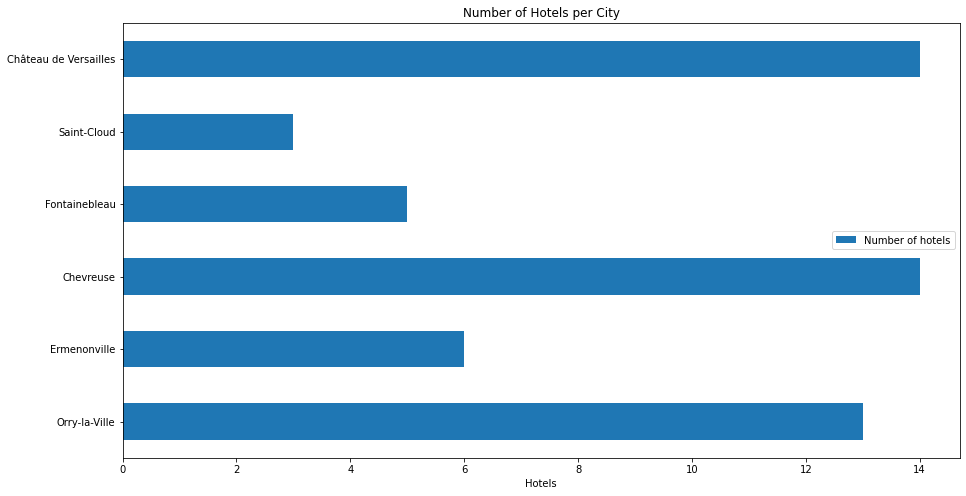

In [51]:
from matplotlib import pyplot as plt
df_Hotels.plot(kind = 'barh', figsize = (15, 8))

plt.ylabel('') 
plt.xlabel('Hotels') 
plt.title('Number of Hotels per City') 

plt.show()

As previously mentioned, data with the name and the surface of the parks were taken from Wikipedia to realize the below dataframe. 

In [52]:
Parks = {'Park': ['Parc Naturel Régional Oise', ' Parc Jean-Jacques Rousseau','Parc Naturel de la Haute Vallée','Forêt de Fontainebleau','Domaine National','Château de Versailles'],
        'Surface in km2': ['600','34','815','250','5','8']
         }                                     

df_surfaces = pd.DataFrame (Parks, columns = ['Park','Surface in km2'])
df_surfaces

,Park,Surface in km2
0,Parc Naturel Régional Oise,600
1,Parc Jean-Jacques Rousseau,34
2,Parc Naturel de la Haute Vallée,815
3,Forêt de Fontainebleau,250
4,Domaine National,5
5,Château de Versailles,8


In [53]:
df_surfaces.dtypes

Park              object
Surface in km2    object
dtype: object

In [54]:
df_surfaces["Surface in km2"] = df_surfaces["Surface in km2"].astype(int) 

In [55]:
df_surfaces.set_index(['Park'], inplace = True) 

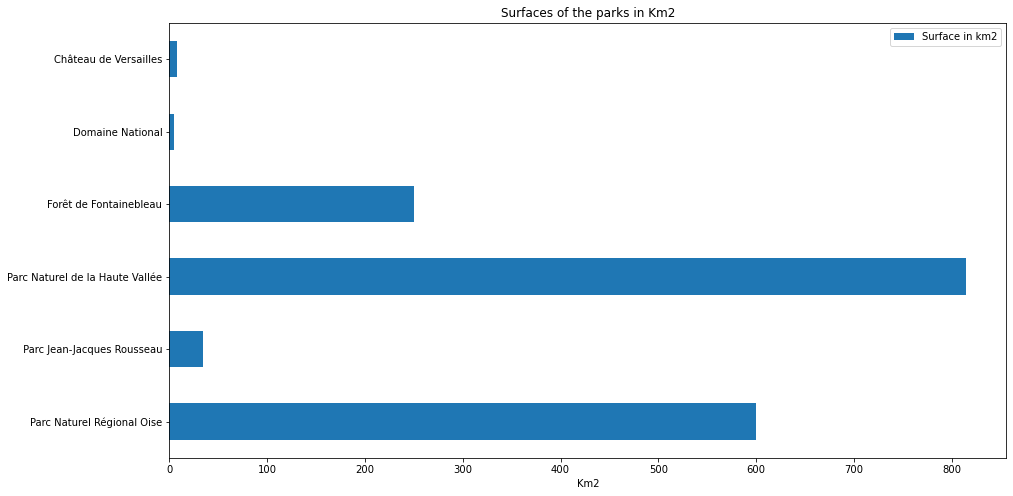

In [56]:
from matplotlib import pyplot as plt
df_surfaces.plot(kind = 'barh', figsize = (15, 8))

plt.ylabel('') 
plt.xlabel('Km2') 
plt.title('Surfaces of the parks in Km2') 

plt.show()

# Conclusion

After analyzing the most popular areas in the cities nearby Paris, such as hotels to understand where the competitors are and natural parks, to find the biggest, it has come to our attention that the area in Fontainebleau is the best suitable for opening a new hotel with our business goal as it is the area with the lowest competition and a great surfaces of forest well know for its remarkable hiking. 


The project could, however, acts just as the base for a further project as it only has the scope to define the area of most interested for a relative business project.